In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [15]:
# mouse_drug_data.head()
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
# Combine the data into a single dataset
combined = pd.merge(clinical_trial_data, mouse_drug_data, on=['Mouse ID','Mouse ID'])

# sort by drug and timepoint
combined_sorted = combined.sort_values(by=['Drug','Timepoint'])

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [33]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
average_tumor_volume_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
average_tumor_volume_grouping = pd.DataFrame(average_tumor_volume_grouping)
average_tumor_volume = average_tumor_volume_grouping.reset_index()
# Preview DataFrame
average_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [47]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_volume_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
std_tumor_volume_grouping = pd.DataFrame(std_tumor_volume_grouping)
std_tumor_volume = std_tumor_volume_grouping.reset_index()
# Preview DataFrame
std_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [48]:
# help(pd.pivot_table)

In [49]:
# Minor Data Munging to Re-Format the Data Frames
reformat = pd.pivot_table(combined_sorted,values='Tumor Volume (mm3)',index='Timepoint',columns='Drug',aggfunc=np.mean)
# Preview that Reformatting worked
reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [76]:
drugs = combined_sorted.Drug.unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

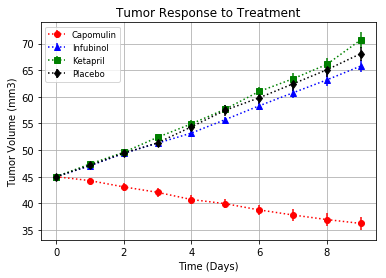

In [112]:
# single out data
Capomulin_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Capomulin']
Capomulin_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Capomulin']
Infubinol_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Infubinol']
Infubinol_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Infubinol']
Ketapril_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Ketapril']
Ketapril_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Ketapril']
Placebo_average_tumor_volume = average_tumor_volume[average_tumor_volume.Drug == 'Placebo']
Placebo_std_tumor_volume = std_tumor_volume[std_tumor_volume.Drug == 'Placebo']

# Generate the Plot (with Error Bars)
x_axis = np.arange(0, len(Capomulin_average_tumor_volume), 1)

fig, ax = plt.subplots()

# error bars
Capomulin=ax.errorbar(x_axis, Capomulin_average_tumor_volume['Tumor Volume (mm3)'], Capomulin_std_tumor_volume['Tumor Volume (mm3)'], fmt="or",ls='dotted') #circle red
Infubinol=ax.errorbar(x_axis, Infubinol_average_tumor_volume['Tumor Volume (mm3)'], Infubinol_std_tumor_volume['Tumor Volume (mm3)'], fmt="^b",ls='dotted') #triangle blue
Ketapril=ax.errorbar(x_axis, Ketapril_average_tumor_volume['Tumor Volume (mm3)'], Ketapril_std_tumor_volume['Tumor Volume (mm3)'], fmt="sg",ls='dotted') #square green
Placebo=ax.errorbar(x_axis, Placebo_average_tumor_volume['Tumor Volume (mm3)'], Placebo_std_tumor_volume['Tumor Volume (mm3)'], fmt="dk",ls='dotted') #diamond black
# Incorporate the other graph properties
plt.xlabel('Time (Days)', fontdict=None, labelpad=None)
plt.ylabel('Tumor Volume (mm3)', fontdict=None, labelpad=None)
plt.title('Tumor Response to Treatment', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)
# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

In [101]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [106]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_metastatic_response_to_treatment_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
average_metastatic_response_to_treatment_grouping = pd.DataFrame(average_metastatic_response_to_treatment_grouping)
average_metastatic_response_to_treatment = average_metastatic_response_to_treatment_grouping.reset_index()
# Preview DataFrame
average_metastatic_response_to_treatment_grouping.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [108]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_metastatic_response_to_treatment_grouping = combined_sorted.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
std_metastatic_response_to_treatment_grouping = pd.DataFrame(std_metastatic_response_to_treatment_grouping)
std_metastatic_response_to_treatment = std_metastatic_response_to_treatment_grouping.reset_index()
# Preview DataFrame
std_metastatic_response_to_treatment_grouping.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [110]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic_sites = pd.pivot_table(combined_sorted,values='Metastatic Sites',index='Timepoint',columns='Drug',aggfunc=np.mean)
# Preview that Reformatting worked
reformat_metastatic_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


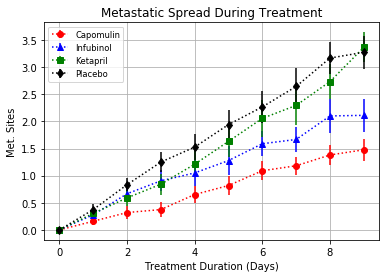

In [114]:
# single out data
Capomulin_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Capomulin']
Capomulin_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Capomulin']
Infubinol_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Infubinol']
Infubinol_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Infubinol']
Ketapril_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Ketapril']
Ketapril_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Ketapril']
Placebo_average_metastatic_response_to_treatment = average_metastatic_response_to_treatment[average_metastatic_response_to_treatment.Drug == 'Placebo']
Placebo_std_metastatic_response_to_treatment = std_metastatic_response_to_treatment[std_metastatic_response_to_treatment.Drug == 'Placebo']

# Generate the Plot (with Error Bars)
x_axis = np.arange(0, len(Capomulin_average_metastatic_response_to_treatment), 1)

fig, ax = plt.subplots()

# error bars
Capomulin=ax.errorbar(x_axis, Capomulin_average_metastatic_response_to_treatment['Metastatic Sites'], Capomulin_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="or",ls='dotted') #circle red
Infubinol=ax.errorbar(x_axis, Infubinol_average_metastatic_response_to_treatment['Metastatic Sites'], Infubinol_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="^b",ls='dotted') #triangle blue
Ketapril=ax.errorbar(x_axis, Ketapril_average_metastatic_response_to_treatment['Metastatic Sites'], Ketapril_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="sg",ls='dotted') #square green
Placebo=ax.errorbar(x_axis, Placebo_average_metastatic_response_to_treatment['Metastatic Sites'], Placebo_std_metastatic_response_to_treatment['Metastatic Sites'], fmt="dk",ls='dotted') #diamond black
# Incorporate the other graph properties
plt.xlabel('Treatment Duration (Days)', fontdict=None, labelpad=None)
plt.ylabel('Met. Sites', fontdict=None, labelpad=None)
plt.title('Metastatic Spread During Treatment', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(
    handles=[Capomulin,Infubinol,Ketapril,Placebo],
    labels=['Capomulin','Infubinol','Ketapril','Placebo'],
    fontsize='small',
    markerscale=1
)
# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [27]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [28]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [29]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [30]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined